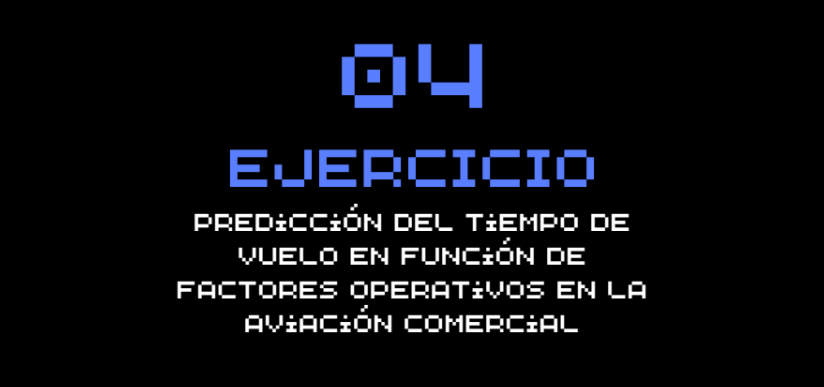
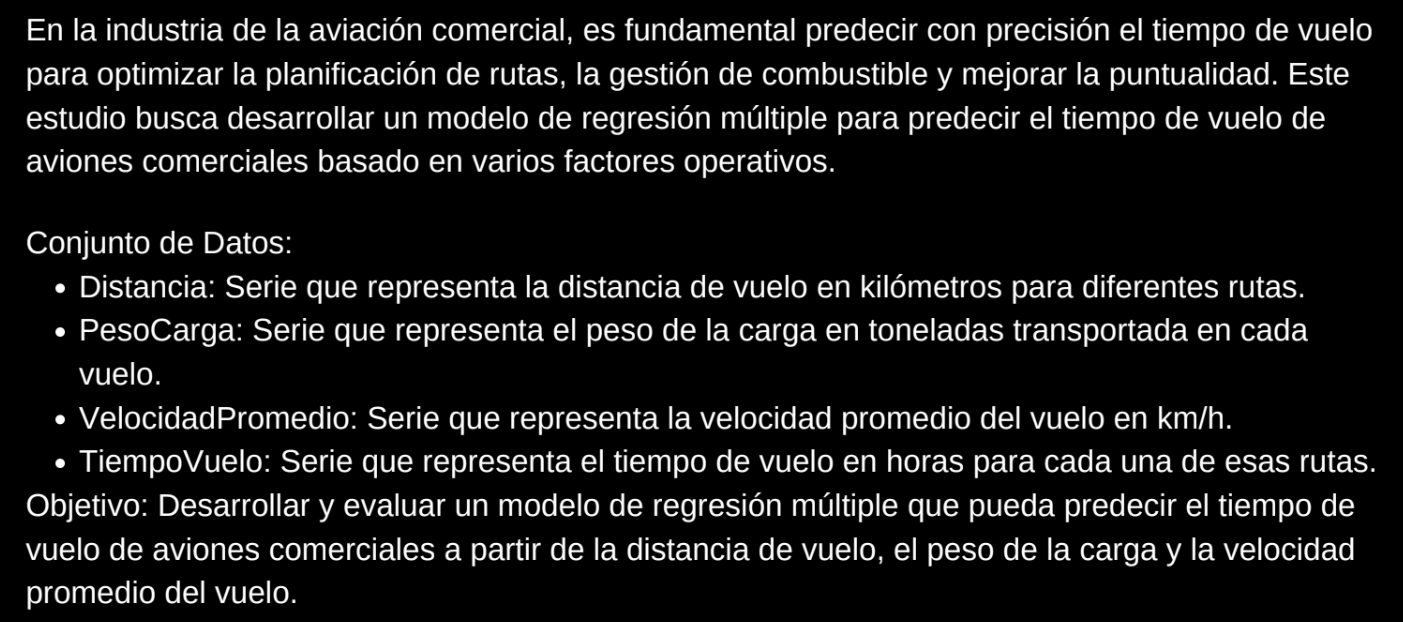
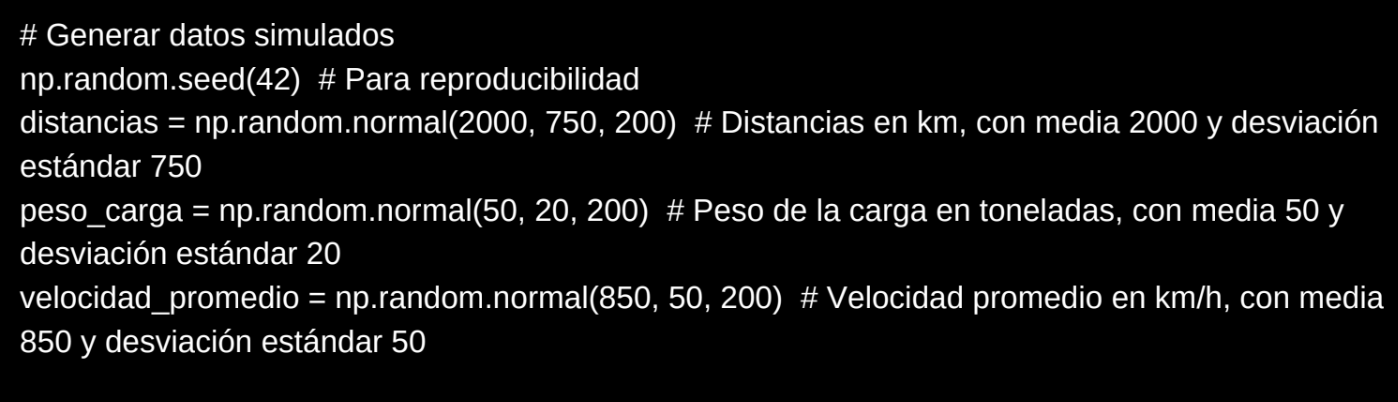

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Generar datos simulados
np.random.seed(42)  # Para reproducibilidad
distancias = np.random.normal(2000, 750, 200)  # Distancias en km, con media 2000 y desviación estándar 750
peso_carga = np.random.normal(50, 20, 200)  # Peso de la carga en toneladas, con media 50 y desviación estándar 20
velocidad_promedio = np.random.normal(850, 50, 200)  # Velocidad promedio en km/h, con media 850 y desviación estándar 50

# Asumir una relación lineal con variación
tiempo_vuelo = distancias / velocidad_promedio + peso_carga * 0.01 + np.random.normal(0, 0.1, 200)  # Tiempo de vuelo en horas

# Crear DataFrame
df = pd.DataFrame({
    'Distancia': distancias,
    'PesoCarga': peso_carga,
    'VelocidadPromedio': velocidad_promedio,
    'TiempoVuelo': tiempo_vuelo
})


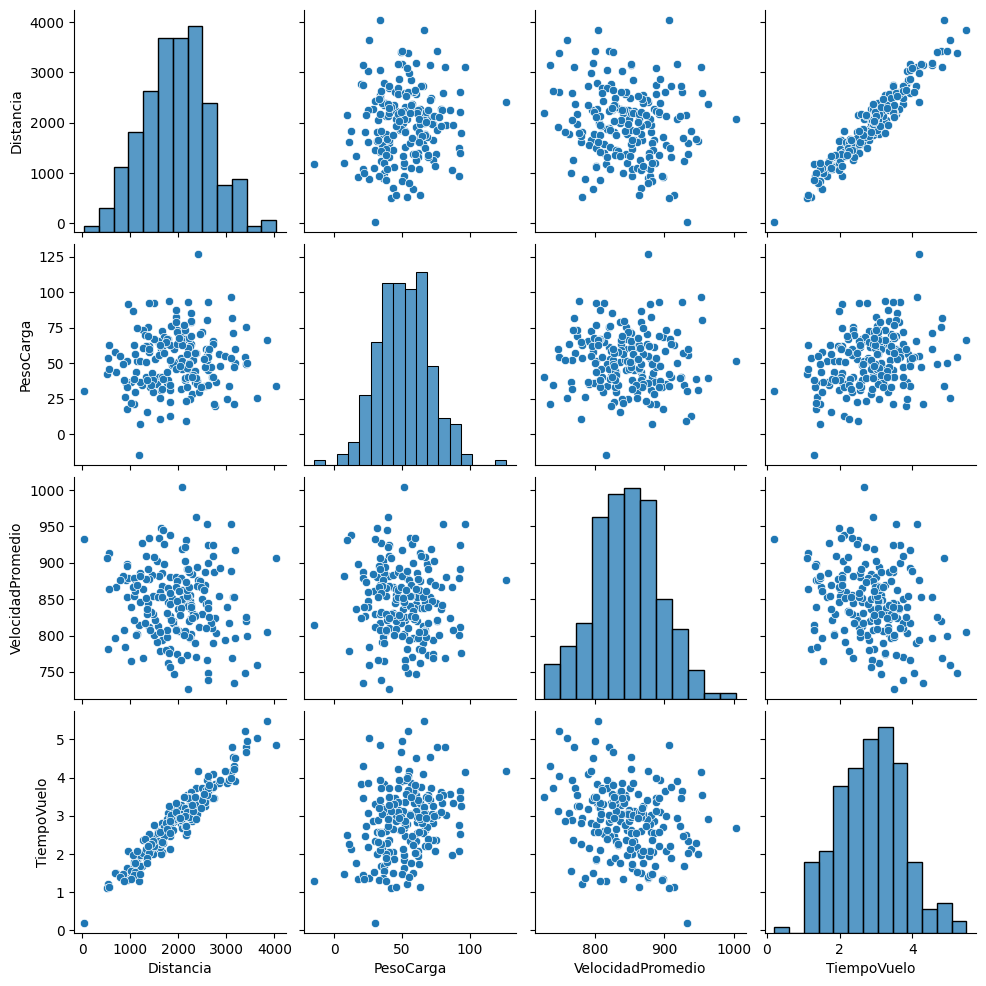

In [2]:
# Visualizar las relaciones entre las variables independientes y la variable dependiente
sns.pairplot(df)
plt.show()


In [3]:
# Análisis de correlación
print("Correlación entre variables:")
print(df.corr())


Correlación entre variables:
                   Distancia  PesoCarga  VelocidadPromedio  TiempoVuelo
Distancia           1.000000   0.095147          -0.134197     0.961371
PesoCarga           0.095147   1.000000          -0.032626     0.290571
VelocidadPromedio  -0.134197  -0.032626           1.000000    -0.276507
TiempoVuelo         0.961371   0.290571          -0.276507     1.000000


In [4]:
# Preparar los datos para el modelo de regresión múltiple
X = df[['Distancia', 'PesoCarga', 'VelocidadPromedio']]  # Variables independientes
y = df['TiempoVuelo']  # Variable dependiente

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [5]:
# Crear y entrenar el modelo de regresión múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)


LinearRegression()

In [6]:
# Predecir y evaluar el modelo
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print("MSE (Error Cuadrático Medio):", mse)
print("R² (Coeficiente de Determinación):", r2)


Evaluación del Modelo:
MSE (Error Cuadrático Medio): 0.010153075567812886
R² (Coeficiente de Determinación): 0.986473088401253


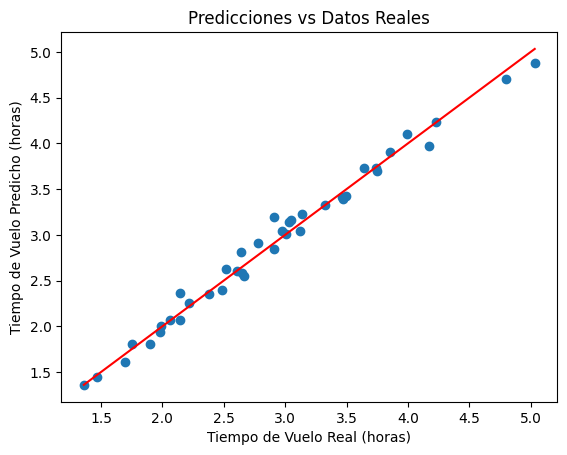

In [7]:
# Visualizar las predicciones del modelo y compararlas con los datos reales
plt.scatter(y_test, y_pred)
plt.title('Predicciones vs Datos Reales')
plt.xlabel('Tiempo de Vuelo Real (horas)')
plt.ylabel('Tiempo de Vuelo Predicho (horas)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Línea de identidad
plt.show()


In [8]:
# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:")
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")
print(f"Distancia: {modelo.coef_[0]}")
print(f"PesoCarga: {modelo.coef_[1]}")
print(f"VelocidadPromedio: {modelo.coef_[2]}")


Coeficientes del modelo:
Intercepto: 2.3605992544980183
Coeficientes: [ 0.00119986  0.00889484 -0.00274412]
Distancia: 0.001199862127704385
PesoCarga: 0.00889483813189711
VelocidadPromedio: -0.0027441231673676018
